In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import animation, rc
    
GIT = 'https://github.com/tyokokur/tmpdat/raw/main/nfh/'

###COOLWARM COLORMAP DOCUMENTATION  
#https://depts.washington.edu/airqual/coolwarm.m
#Base blue: RGB = [59 76 192]
#Base red:  RGB = [180 4 38]
warm_red = [180/255, 4/255, 38/255]
cool_blue = [59/255,76/255,192/255]
mix_purp = np.divide(np.add(warm_red,cool_blue),2).tolist()

tjy_udf:  ['H_find', 'Kap_D', 'git_sync', 'lighten_color', 'plot_anim', 'plot_pha', 'ticks']


Files:
 ['phb5v4c1_c004.dat', 'phb5v4c1_c005.dat', 'phb5v4c1_c006.dat', 'phb5v4c1_c008.dat', 'phb5v4c1_c010.dat', 'phb5v4c1_c015.dat', 'phb5v4c1_c020.dat', 'phb5v4c1_c030.dat', 'phb5v4c1_c040.dat', 'phb5v4c1_c050.dat']
thresh
[135.70961729006686, 127.46357837181044, 120.84611900097941, 110.15690184049079, 101.1641497298688, 83.23119685648028, 71.95496141789245, 61.36504600585529, 56.7620824483491, 54.19341046277666]
[4.820137006686982, 4.311261603125781, 3.935625385563126, 3.4083515636765926, 3.048522315039426, 2.489108047111568, 2.1556308015628907, 1.7600651792185937, 1.524261157519713, 1.363340625470637]


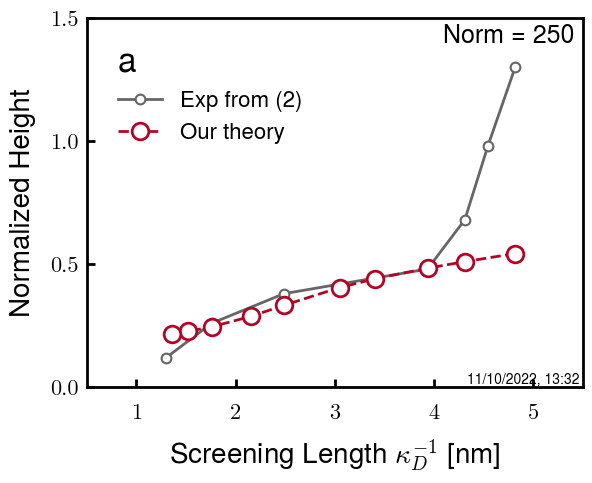

maxpt
[24.640738830590934, 24.32049890076523, 24.05497034310396, 23.635371667864018, 23.311762316015606, 22.67466109334164, 22.21007292559443, 21.62834369199182, 21.29064785025984, 21.071244016617694]
[4.820137006686982, 4.311261603125781, 3.935625385563126, 3.4083515636765926, 3.048522315039426, 2.489108047111568, 2.1556308015628907, 1.7600651792185937, 1.524261157519713, 1.363340625470637]


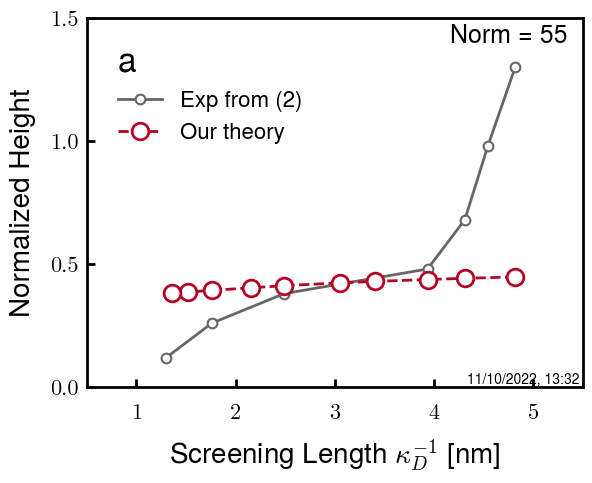

norm
[47.18178262812956, 44.19786876432277, 41.747113210734376, 38.005393641259786, 35.47416391522668, 32.32996982747103, 30.987661649255553, 29.674507190130615, 29.000875728105534, 28.590171757700304]
[4.820137006686982, 4.311261603125781, 3.935625385563126, 3.4083515636765926, 3.048522315039426, 2.489108047111568, 2.1556308015628907, 1.7600651792185937, 1.524261157519713, 1.363340625470637]


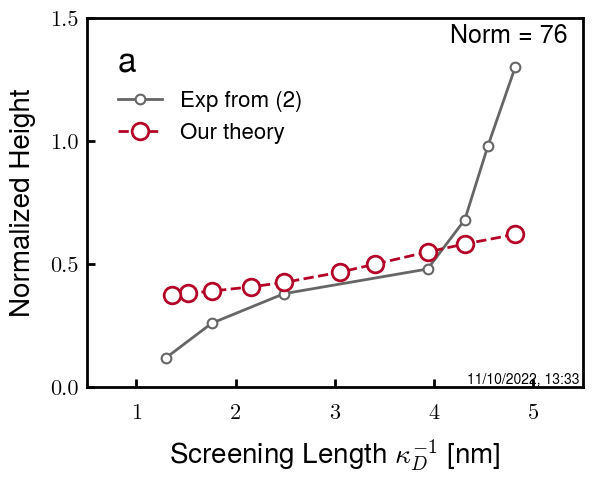

In [19]:
## NFH
c1 = [122/255, 28/255, 188/255]
c2 = [252/255, 159/255, 128/255]

from datetime import datetime
labs =  ['004', '005', '006', '008', '010', '015', '020', '030', '040', '050']
tack = [0]*len(labs) #see add for options
#tack[8:9] = [1]*2
#tack[10:] = [2]*6
add = ['', '_1C', '_']
read_list = ['phb5v4c1_c'+add[tack[ind]]+i+'.dat' for ind, i in enumerate(labs)]
print("Files:\n", read_list)
read_list = [GIT+i for i in read_list]
algs = ['thresh', 'maxpt', 'norm']

##########################################
##########################################
b0 = 2.5 
norms = [250, 55, 76]
thresh = 1e-04
##########################################
##########################################

for algind in range(3):
# for algind in [2]:
    print(algs[algind])
    LH = np.zeros(len(read_list))
    print("[", end="")
    for i in range(len(read_list)): 
      LH[i] = tjy.H_find(read_list[i], alg=algs[algind], b0=b0, thresh=thresh)
      print(LH[i], end="")
      if i!=(len(read_list)-1): print(", ", end="")
    print("]")

    ####################


    SrCs = [float(i) for i in labs]
    Sr_equil = LH
    Sr_equil = np.divide(Sr_equil,  norms[algind])
    CsDeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in SrCs]
    print(CsDeb)

    #Sr2014 pH2.4 fitted in Illustrator
    x = [4, 4.5, 5, 6, 15, 30, 55]
    y = [1.3, 0.98, 0.68, 0.48, 0.38, 0.26, 0.12]
    xDeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in x]

    f, ax = plt.subplots(1,1)
    ax.plot(xDeb, y, 'o-', c=tjy.lighten_color('k', 0.60), mew=1.5, ms=7, markerfacecolor='w',label="Exp from (2)")

    # Paper format
    # ax.plot(CsDeb, Sr_equil, '-', c=c2, lw=3, markerfacecolor='w', zorder=3, label="Our theory")
    
    # PPT format
    ax.plot(CsDeb, Sr_equil, 'o--', color=warm_red, mew=2, ms=12, markerfacecolor='w', zorder=3, label="Our theory")
    plt.gca().text(0.85, 0.95, 'Norm = {:.0f}'.format(norms[algind]), transform=plt.gca().transAxes, fontsize=18,
           ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))
    plt.gca().text(0.88, 0.02, '{}'.format(datetime.now().strftime("%m/%d/%Y, %H:%M")), transform=plt.gca().transAxes, fontsize=10,
           ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))
    
    ax.set_title(r"")
    ax.set_ylim(0, 1.5)
    plt.yticks([0.0, 0.5, 1.0, 1.5])
    plt.xticks([0, 1, 2, 3, 4, 5])
    ax.set_xlim(0.5,5.5)

    ax.set_xlabel(r'Screening Length $\mathbf{\kappa}_D^{-1}$'+' [nm]')
    ax.set_ylabel('Normalized Height')

    leg = ax.legend(bbox_to_anchor=(0.0, 1.00), loc='upper left',fontsize=16,alignment='left', title='a', title_fontproperties={'size':24})

    tjy.ticks()
    if algind==2: plt.savefig('./imgs/hprof.eps')
    plt.show()

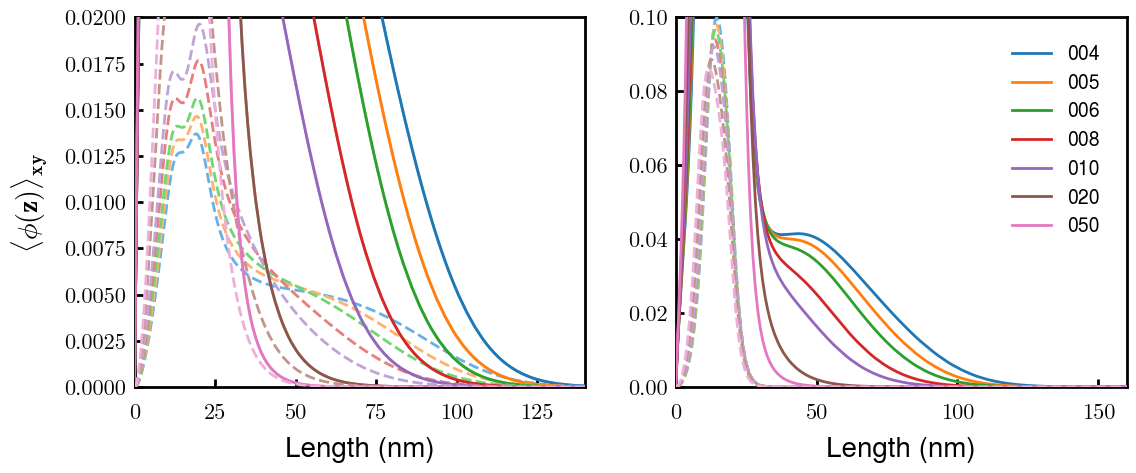

In [9]:
# labs = ['004', '005', '006', '008', '010', '015', '020', '030', '040', '050']
labs = ['004', '005', '006', '008', '010', '020', '050']
read_list = [GIT+"phb5v4c1_c"+i+".dat" for i in labs]
# read_list = [GIT+"ph_a021c"+i+"_x103s002.dat" for i in labs]
# labs = ['001', '002', '003', '005', '010', '025', '050', '100']
# read_list = [GIT+"phb10v10L_c"+i+".dat" for i in labs] 
fig, axs = tjy.plot_pha(read_list, b0=2.5, block1=4, block2=1, x1_end=140, x2_end=160, y1_end=0.02, y2_end=0.10, labs=labs, double=True)

-2.1233204580143467e-05
2.916540313140262e-06
3.5544676986113636e-05
-0.0004282595470619637


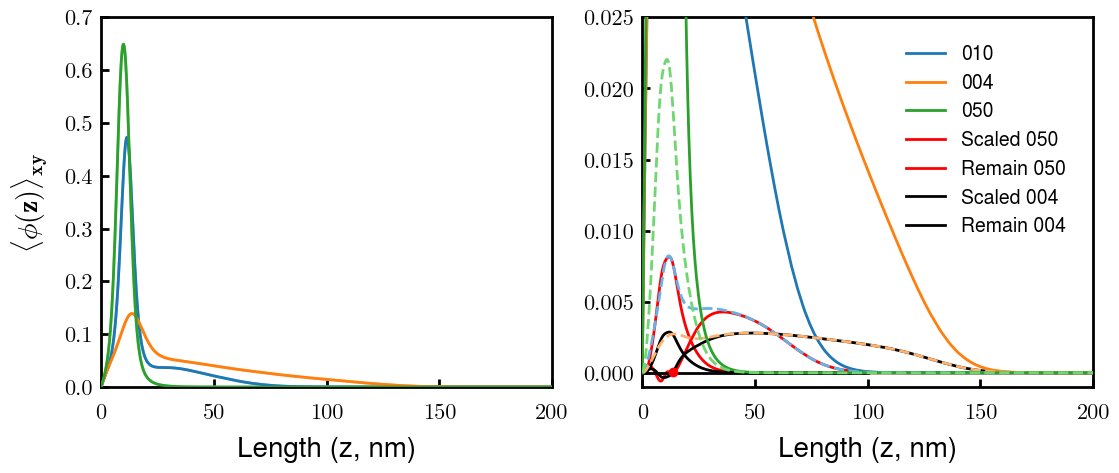

In [4]:
## Vol frac of condensed vs. coil
labs = ['010', '004', '050'] 
read_list = [GIT+"phb2v20_c"+i+".dat" for i in labs]
fig, axs = tjy.plot_pha(read_list, b0=2.0, x1_end=200, y1_end=0.7, y2_end=0.025, labs=labs, block2=4, double=True, show=False)

df0 = pd.read_csv(read_list[0], sep="\s+", skiprows=0, names=['lx','pha', '_2', '_3', '1', '2', '3', '4', 'end', '_9', 'phb'])
df1 = pd.read_csv(read_list[1], sep="\s+", skiprows=0, names=['lx','pha', '_2', '_3', '1', '2', '3', '4', 'end', '_9', 'phb'])
b = pd.read_csv(read_list[-1], sep="\s+", skiprows=0, names=['lx','pha', '_2', '_3', '1', '2', '3', '4', 'end', '_9', 'phb'])

from scipy.interpolate import CubicSpline
x_new = np.linspace(0, 200, 1000)
f = CubicSpline(b.lx*2, b.end, bc_type=('not-a-knot', (1, 0)))
base = f(x_new)

s = CubicSpline(x_new+1.0, 0.37*base)
s1 = s(x_new)
f1 = CubicSpline(df0.lx*2, df0.end, bc_type=('not-a-knot', (1, 0)))
rem1 = f1(x_new) - s1
print(rem1[65])
print(np.trapz(rem1[:65], x_new[:65]))

s = CubicSpline(x_new+1.0, 0.130*base)
s2 = s(x_new)
f1 = CubicSpline(df1.lx*2, df1.end, bc_type=('not-a-knot', (1, 0)))
rem2 = f1(x_new) - s2
print(rem2[68])
print(np.trapz(rem2[:68], x_new[:68]))

axs[1].plot(x_new, s1,  c='r', label='Scaled 050')
axs[1].plot(x_new, rem1,  c='r', label='Remain 050')
axs[1].scatter(x_new[68], rem2[68], c='r', zorder=10)
axs[1].plot(x_new, s2,  c='k', label='Scaled 004')
axs[1].plot(x_new, rem2,  c='k', label='Remain 004')
axs[1].plot([0, 100], [0,0], 'k')
axs[1].set_ylim((-0.001, 0.025))
axs[1].legend()
plt.show()

x_shift: 1.00, int: 6.4412e-05


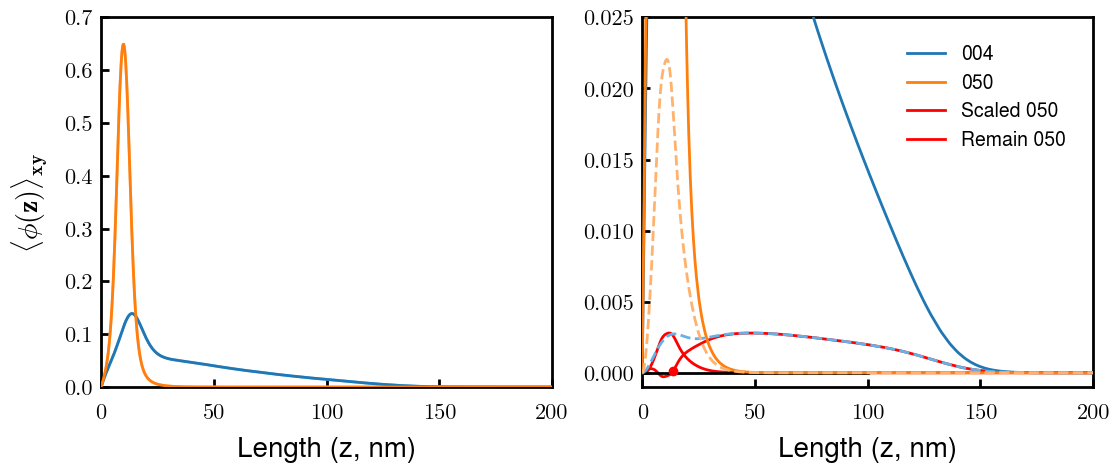

In [10]:
## TEST CELL
labs = ['004', '050'] 
read_list = [GIT+"phb2v20_c"+i+".dat" for i in labs]
fig, axs = tjy.plot_pha(read_list, b0=2.0, x1_end=200, y1_end=0.7, y2_end=0.025, labs=labs, block2=4, double=True, show=False)

df0 = pd.read_csv(read_list[0], sep="\s+", skiprows=0, names=['lx','pha', '_2', '_3', '1', '2', '3', '4', 'end', '_9', 'phb'])
df1 = pd.read_csv(read_list[1], sep="\s+", skiprows=0, names=['lx','pha', '_2', '_3', '1', '2', '3', '4', 'end', '_9', 'phb'])
b = pd.read_csv(read_list[-1], sep="\s+", skiprows=0, names=['lx','pha', '_2', '_3', '1', '2', '3', '4', 'end', '_9', 'phb'])

from scipy.interpolate import CubicSpline
x_new = np.linspace(0, 200, 1000)
f = CubicSpline(b.lx*2, b.end, bc_type=('not-a-knot', (1, 0)))
base = f(x_new)
scale = max(df0.end)/max(base)

def last_zero(rem1):
## Find last near-zero value in rem1
    A = np.nonzero(np.abs(rem1)<1e-04)[0]
    cA = [i for i in A[::-1]]
    for ind, i in enumerate(cA):
        try:
            if (cA[ind+1]-i == -1): continue
            else: start = A[len(A)-2-ind]; break
        except IndexError: 
            return 0
    return start

vals = np.arange(0.0, 5.00, 0.05)
ints = np.zeros(len(vals))
fints = np.zeros(len(vals))
for ind, shift in enumerate(vals):
    s = CubicSpline(x_new+shift, scale*base)
    s1 = s(x_new)
    f1 = CubicSpline(df0.lx*2, df0.end, bc_type=('not-a-knot', (1, 0)))
    rem1 = f1(x_new) - s1
    start = last_zero(rem1)
    ints[ind] = np.trapz(rem1[:start], x_new[:start]) ## Integral from 0 to start of coil region
    fints[ind]= np.trapz(rem1, x_new)  ## Integral of entire calculated coil profile
    
# display(pd.DataFrame([ints, fints], columns=vals).transpose())
# display(pd.DataFrame([ints, fints], columns=vals).transpose().loc[2.75])

if (min(np.abs(fints)) < 1e-04): # Negligible amount of coil 
    best = vals[np.nonzero(np.abs(fints)<1e-04)][0] # First value which meets criterion
    print(np.abs(fints))
else: 
    best = vals[np.nonzero(abs(ints)==min(np.abs(ints)))][0]
s = CubicSpline(x_new+best, scale*base)
s1 = s(x_new)
f1 = CubicSpline(df0.lx*2, df0.end, bc_type=('not-a-knot', (1, 0)))
rem1 = f1(x_new) - s1
start = last_zero(rem1)
print('x_shift: {:.2f}, int: {:.4e}'.format(best, np.trapz(rem1[:start], x_new[:start]))) ## Integral from 0 to start of coil region
    
axs[1].plot(x_new, s1,   c='r', label='Scaled 050')
axs[1].plot(x_new, rem1, c='r', label='Remain 050')
axs[1].scatter(x_new[start], rem1[start], c='r', zorder=10)
axs[1].plot([0, 100], [0,0], 'k')
axs[1].set_ylim((-0.001, 0.025))
axs[1].legend()
plt.show()

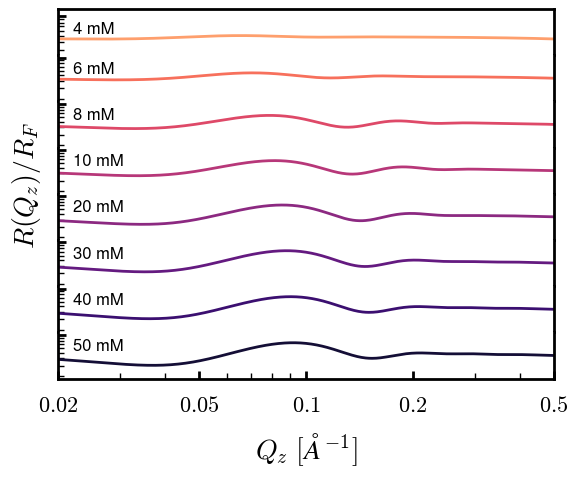

In [18]:
rho_e_w = 3.33e23 # electron density of water, e/cm3 (Source: Brasla, 1985)
rho_e_w *= 1e2**3 / 1e10**3 # e/AA3
r_e = 2.818e-15 # m
r_e *= 1e10 # AA

def RQZ_pha(phname, qz):
    ph = pd.read_csv(phname, sep="\s+", skiprows=0, header=None)
    pha = ph[2]
    pha.update(pd.Series([2.32], index=[0])) # electron density of SiO2 substrate, assuming polymer electron density 1.0: (CH2)x = 0.95 (Source: Russel, 1990)
    phb = ph[10]
    phe = pha*1.0 + phb*rho_e_w # electron density profile, rho_e_protein = 1.0
    z = ph[0]*10 # nm to AA
    dz = z[1] - z[0]
    dpdz = np.gradient(phe, dz)
    return [RQZ(z, dpdz, i) for i in qz]

def RQZ(z, dpdz, qzi): return np.power(np.absolute(np.trapz(dpdz*np.exp(1j*qzi*z), x=z)/rho_e_w), 2) # j is imaginary

def Z_PHA(phname):
    ph = pd.read_csv(phname, sep="\s+", skiprows=0, header=None)
    ph.iloc[0,1] = 10 # Artificial substrate with 5x electron density as polymer and solvent
    return ph.iloc[:,0:2] 

def RQZ_plot3(row, qz, filename, color,light_frac):
  laxs[row].plot(qz, RQZ_pha(filename, qz), color=color, alpha=1.0)
  return

qz = np.logspace(-3,0,1000) # 0.001 to 1
light_arr = np.linspace(1.0,1.0, 1)
f, laxs = plt.subplots(8,1)

labs = (4,6,8,10,20,30,40,50)
phs = ['phb2v2c1_c{:03d}.dat'.format(i) for i in labs]
cividis = mpl.colormaps['magma'].resampled(11)(range(8,0,-1))
for row, i in enumerate(cividis): 
    RQZ_plot3(row, qz, GIT+phs[row], i, light_arr[0])
    plt.sca(laxs[row]); plt.annotate('{} mM'.format(labs[row]), (0.022, 55), fontsize=12) 
    
for i in laxs:
  i.set_xscale('log')
  i.set_xlim([0.02, 0.50])
  i.set_xlim([0.02, 0.50])
  ticklabs = [0.02, 0.05, 0.1, 0.2, 0.5]
  i.set_xticks(ticklabs)
  i.set_xticklabels(['${}$'.format(i) for i in ticklabs])
  i.set_xticklabels([], minor=True)
  i.set_yscale('log')
  if i!=laxs[0]: i.set_ylim([18, 110])
  else: i.set_ylim([25, 130])
  i.tick_params(axis='y',which='both', labelleft=False)
  if i != laxs[-1]: 
    i.tick_params(axis='x', which='both', length=0.0, labelbottom=False)
    i.spines['bottom'].set_color('none')
  if i!= laxs[0]: 
    i.spines['top'].set_color('none')

plt.gcf().text(0.050, 0.40, r'$R(Q_z)/R_F$', 
               rotation=90, fontsize=20)
plt.subplots_adjust(hspace=0)
laxs[-1].set_xlabel(r'$Q_z$' ' ' r'$[\AA^{-1}]$')
plt.savefig('./imgs/refs.eps')
plt.show()

[4.820137006686982, 4.311261603125781, 3.935625385563126, 3.4083515636765926, 3.048522315039426, 2.489108047111568, 2.1556308015628907, 1.7600651792185937, 1.524261157519713, 1.363340625470637]


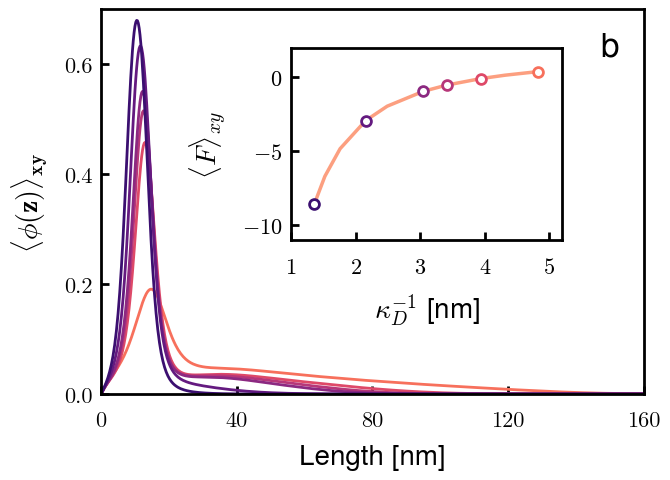

In [33]:
block1 = None
b0 = 2.2
labs = ['004', '006', '008', '010', '020', '050']
read_list = [GIT+"phb2v2c1_c"+i+".dat" for i in labs]
block_Ni = [[5]]*len(read_list)
             
div = [b0]*len(read_list) #b0
# colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']*5
colors = mpl.colormaps['magma'].resampled(11)(range(7, -1, -1))

fig, ax = plt.subplots(1,1, figsize=(7,5)) 

## PLOT INSET#################################################
axins = ax.inset_axes([0.35, 0.40, 0.50, 0.50])
df = pd.read_csv(GIT+'freeE.txt', sep='\s+', names=['it', 'lx', 'freeE', 'fDiff', 'inComp', 'andErr'])
marks = df.freeE[[True, False, True, True, True, False, True, False, False, True]]
xDeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in (4,5,6,8,10,15,20,30,40,50)]
xDeb2 = [1/tjy.Kap_D(i*1e-3)*1e9 for i in (4,6,8,10,20,50)]
print(xDeb)
axins.plot(xDeb, df.freeE, '-', c=c2, lw=2.5, markerfacecolor='w', mew = 1.5, ms = 6)
for ind, i in enumerate(marks): axins.scatter(xDeb2[ind], i, s=50, color=colors[ind], linewidth=2.0, facecolor='w', zorder=3)
axins.set_xlim(1.0, 5.2)
axins.set_xticks([1,2,3,4,5])
axins.set_xlabel(r'$\kappa_D^{-1}$ [nm]')
axins.set_ylim(-11, 2.0)
axins.set_ylabel(r'$\langle F \rangle_{xy}$')

class ScalarFormatterClass(ticker.ScalarFormatter):
   def _set_format(self):
      self.format = "$%d$" # New precision
axins.yaxis.set_major_formatter(ScalarFormatterClass(useMathText=True))
axins.xaxis.set_major_formatter(ScalarFormatterClass(useMathText=True))
        
## PLOT MAIN###########################################
for k in range(len(read_list)):
  block_Nik = block_Ni[k]
  a = 1
  b = 1
  c = 1
  names = ['rx', 'phA']
  for j in range(len(block_Nik)):
    names += ['phA_T{:d}'.format(a)] +  ['*'*b]+ ['ph{:d}'.format(c+i) for i in range(block_Nik[j])] + ['*'*(b+1)]
    a += 1
    b += 2
    c += block_Nik[j]

  names += ['phB']
  try: df = pd.read_csv(read_list[k], sep="\s+", skiprows=0, names=names)
  except HTTPError: 
      print('{} not found'.format(read_list[k]))
  Nx = len(df.index)

  for i in range(len(block_Nik)*2):
    names.remove('*'*(i+1))
    df = df.drop('*'*(i+1),axis=1)

  Nx = len(df.index)
  rows = range(0, Nx)

  rows = range(0, Nx)

  phAr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phAr = phAr.fillna(0) # with 0s rather than NaNs
  phAT = pd.DataFrame(data=None, index=rows, columns=range(1+len(block_Nik)), dtype=None, copy=False)
  phAT = phAT.fillna(0) # with 0s rather than NaNs
  ph1r = pd.DataFrame(data=None, index=rows, columns=range(1+sum(block_Nik)), dtype=None, copy=False)
  ph1r = ph1r.fillna(0) # with 0s rather than NaNs

  phB = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
  phB = phB.fillna(0) # with 0s rather than NaNs

  ph1r = df.loc[:, ['ph{:d}'.format(i+1) for i in range(sum(block_Nik))]]
  ph1r.insert(0, 'rx', df.iloc[:,0])

  phAT = df.loc[:, ['phA_T{:d}'.format(i+1) for i in range(len(block_Nik))]]
  phAT.insert(0, 'rx', df.iloc[:,0])

  for i in range(Nx):
    phAr.iloc[i, 0] = df.iloc[i,0]
    phAr.iloc[i, 1] = df.iloc[i,1] 
    phB.iloc[i, 0] = df.iloc[i, 0]
    phB.iloc[i, 1] = df.iloc[i, 2 + sum(block_Nik) + len(block_Nik)] 

  lshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)
  rshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)

  # Plot total density (zorder 3)
  lshi[0] = phAr[0] + 0
  rshi[0] = phAr[0] + 0

  ax.plot(np.multiply(lshi[0], div[k]), phAr.iloc[:,1], color = colors[k], zorder = 2, alpha=1.0, label=labs[k])

  # Plot chain types (zorder 2)
  step = 1
  for j in range(len(block_Nik)):
    # ax.plot(np.multiply(lshi[0], div[k]), phAT.iloc[:,j+1], '-',  zorder=2, color=tjy.lighten_color(colors[k], amount=0.50),label='_Total')

    #Plot block densities (zorder 3)
    for i in range(block_Nik[j]):
      if (i == block1): ax.plot(np.multiply(lshi[0], div[k]), ph1r.iloc[:,i+step], ':',  zorder=2, color=tjy.lighten_color(colors[k], 0.60),label='_Block')

    step += block_Nik[j]

conf = [Patch(facecolor=i, edgecolor='k', lw=1.5) for i in colors]
conf += [
          Line2D([0], [0], color='k', ls='-'),
          Line2D([0], [0], color='k', ls='--'),
        ]
plt.ylabel(r'$\bf{\langle\phi(z)\rangle}_{xy}$')
plt.xlabel("Length [nm]")
plt.ylim(0, 0.70)
plt.yticks(np.arange(0, 0.71, 0.2))
plt.xlim(0, 160)
plt.xticks(np.arange(0, 161, 40))
# leg = plt.legend(bbox_to_anchor=(1.00, 0.98), loc='upper right', title='b', title_fontproperties={'size':24}, alignment='left')
plt.text(0.92, 0.88, 'b', fontsize=24, transform=ax.transAxes)

tjy.ticks()
plt.savefig('./imgs/dens.eps')
plt.show()

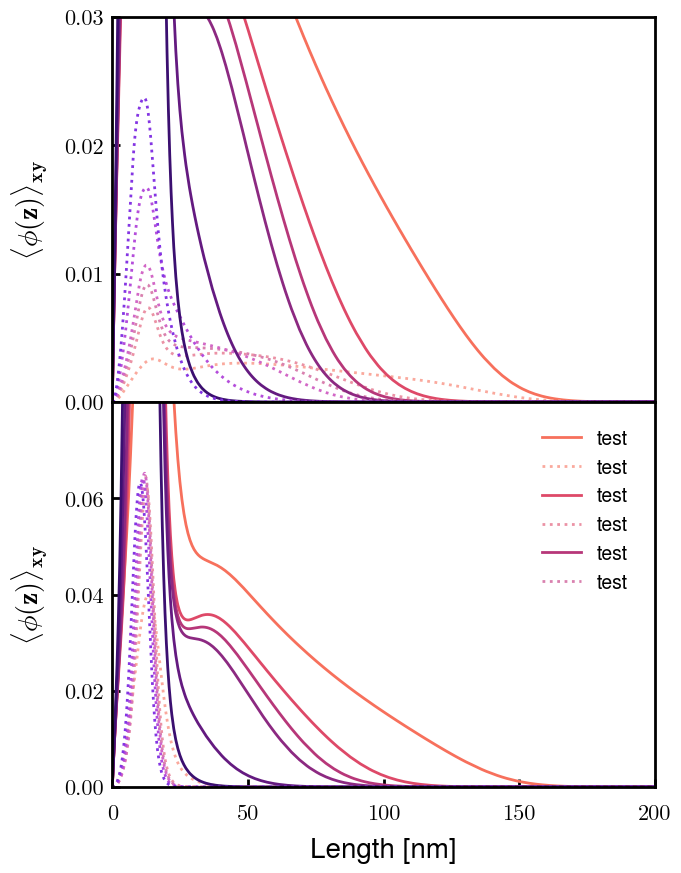

In [55]:
block1 = None
b0 = 2.2
labs = ['004', '006', '008', '010', '020', '050']
read_list = [GIT+"phb2v2c1_c"+i+".dat" for i in labs]
block_Ni = [[5]]*len(read_list)
             
div = [b0]*len(read_list) #b0
# colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']*5
colors = mpl.colormaps['magma'].resampled(11)(range(7, -1, -1))

fig, axs = plt.subplots(2,1, figsize=(7,10)) 
plt.subplots_adjust(hspace=0)
BLOCKS = [4,1]
for ind, AX in enumerate(axs):
    plt.sca(AX)
    block1 = BLOCKS[ind]
    for k in range(len(read_list)):
      block_Nik = block_Ni[k]
      a = 1
      b = 1
      c = 1
      names = ['rx', 'phA']
      for j in range(len(block_Nik)):
        names += ['phA_T{:d}'.format(a)] +  ['*'*b]+ ['ph{:d}'.format(c+i) for i in range(block_Nik[j])] + ['*'*(b+1)]
        a += 1
        b += 2
        c += block_Nik[j]

      names += ['phB']
      try: df = pd.read_csv(read_list[k], sep="\s+", skiprows=0, names=names)
      except HTTPError: 
          print('{} not found'.format(read_list[k]))
      Nx = len(df.index)

      for i in range(len(block_Nik)*2):
        names.remove('*'*(i+1))
        df = df.drop('*'*(i+1),axis=1)

      Nx = len(df.index)
      rows = range(0, Nx)

      rows = range(0, Nx)

      phAr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
      phAr = phAr.fillna(0) # with 0s rather than NaNs
      phAT = pd.DataFrame(data=None, index=rows, columns=range(1+len(block_Nik)), dtype=None, copy=False)
      phAT = phAT.fillna(0) # with 0s rather than NaNs
      ph1r = pd.DataFrame(data=None, index=rows, columns=range(1+sum(block_Nik)), dtype=None, copy=False)
      ph1r = ph1r.fillna(0) # with 0s rather than NaNs

      phB = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
      phB = phB.fillna(0) # with 0s rather than NaNs

      ph1r = df.loc[:, ['ph{:d}'.format(i+1) for i in range(sum(block_Nik))]]
      ph1r.insert(0, 'rx', df.iloc[:,0])

      phAT = df.loc[:, ['phA_T{:d}'.format(i+1) for i in range(len(block_Nik))]]
      phAT.insert(0, 'rx', df.iloc[:,0])

      for i in range(Nx):
        phAr.iloc[i, 0] = df.iloc[i,0]
        phAr.iloc[i, 1] = df.iloc[i,1] 
        phB.iloc[i, 0] = df.iloc[i, 0]
        phB.iloc[i, 1] = df.iloc[i, 2 + sum(block_Nik) + len(block_Nik)] 

      lshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)
      rshi = pd.DataFrame(data=None,  index=rows, columns=range(1), dtype=None, copy=False)

      # Plot total density (zorder 3)
      lshi[0] = phAr[0] + 0
      rshi[0] = phAr[0] + 0

      plt.plot(np.multiply(lshi[0], div[k]), phAr.iloc[:,1], color = colors[k], zorder = 2, alpha=1.0, label=labs[k])

      # Plot chain types (zorder 2)
      step = 1
      for j in range(len(block_Nik)):
        # ax.plot(np.multiply(lshi[0], div[k]), phAT.iloc[:,j+1], '-',  zorder=2, color=tjy.lighten_color(colors[k], amount=0.50),label='_Total')

        #Plot block densities (zorder 3)
        for i in range(block_Nik[j]):
          if (i == block1): plt.plot(np.multiply(lshi[0], div[k]), ph1r.iloc[:,i+step], ':',  zorder=2, color=tjy.lighten_color(colors[k], 0.60),label='_Block')

        step += block_Nik[j]

    conf = [Patch(facecolor=i, edgecolor='k', lw=1.5) for i in colors]
    conf += [
              Line2D([0], [0], color='k', ls='-'),
              Line2D([0], [0], color='k', ls='--'),
            ]

tjy.ticks(axs)
for i in axs: 
    i.set_ylabel(r'$\bf{\langle\phi(z)\rangle}_{xy}$')
    i.set_xlabel("Length [nm]")

axs[0].set_ylim(0, 0.03)
axs[0].set_yticks(np.arange(0, 0.031, 0.01))
axs[0].set_xlim(0, 200)
axs[0].set_xticks([])

axs[1].set_ylim(0, 0.08)
axs[1].set_yticks(np.arange(0, 0.080, 0.02))
axs[1].set_xlim(0, 200)
axs[1].set_xticks(np.arange(0, 201, 50))
axs[1].legend(['test']*6)

plt.savefig('./imgs/block2.eps')
plt.show()